## ThirdAI's NeuralDB

First let's import the relevant module and initialize a neural db class.

In [ ]:
!git clone https://github.com/ThirdAILabs/Demos.git

fatal: destination path 'Demos' already exists and is not an empty directory.


In [ ]:
!pip install thirdai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyTrie: filename=PyTrie-0.4.0-py3-none-any.whl size=6081 sha256=3020e5a221c3485919a1451a49a3bc442ab699cd7155dbf5415e6978a2083438
  Stored in directory: /root/.cache/pip/wheels/87/0e/a3/3563272cb57af4afbc50c4c7882dd4540944aadde25c82bd45
Successfully built PyTrie


In [ ]:
from thirdai import licensing
licensing.activate("15EABF-7989A6-794152-D11EEF-8DEB68-V3")

from thirdai import neural_db as ndb

db = ndb.NeuralDB(user_id="pengcheng0721") # you can use any username, in the future, this username will let you push models to the model hub

### Initialize

At this point, the db is uninitialized.

##### Option 1: We can either initialize from scratch like this

In [ ]:
db.from_scratch()

##### Option 2: Or even load from a base DB that we provide, as shown below

In [ ]:
import os

checkpoint = "qna_db_1"

if not os.path.exists(checkpoint):
    os.system("wget -O qna_db_1.zip 'https://www.dropbox.com/scl/fi/s1zhxmwjpayj5jphzct0p/qna_1_db.zip?dl=0&rlkey=ftcgrzt1rpc2d6hx0iuk1lz1r'")
    os.system("unzip qna_db_1.zip -d qna_db_1")

db.from_checkpoint("qna_db_1")

### Prep CSV data

Let's insert things into it!

Currently, we support adding as many CSV files as you wish. All other file formats have to be converted into CSV files where each row represents a paragraph/text-chunk of the document.

The file is required to have a column named "DOC_ID" with rows numbered from 0 to n_rows-1.

In [ ]:
%cd Demos/neural_db/

/content/Demos/neural_db


In [ ]:
from utils import CSV

csv_files = ['/content/pptx_data.csv']
csv_docs = []

for file in csv_files:
    csv_doc = CSV(
        path=file,
        id_column="DOC_ID",
        strong_columns=["text_clean"],
        weak_columns=["text"],
        reference_columns=["text_clean"])

    csv_docs.append(csv_doc)

### Insert CSV files into NeuralDB

In [ ]:
source_ids = db.insert(csv_docs, train=False)

### Insert and Train

In [ ]:
source_ids = db.insert(csv_docs, train=True)

loaded data | source 'Documents:
pptx_data.csv' | vectors 5372 | batches 3 | time 0s | complete

train | epoch 0 | train_steps 2463 | train_hash_precision@5=0.204356  | train_batches 3 | time 359s

loaded data | source 'Documents:
pptx_data.csv' | vectors 5372 | batches 3 | time 0s | complete

train | epoch 0 | train_steps 2466 | train_hash_precision@5=0.663217  | train_batches 3 | time 348s

loaded data | source 'Documents:
pptx_data.csv' | vectors 5372 | batches 3 | time 0s | complete

train | epoch 0 | train_steps 2469 | train_hash_precision@5=0.854095  | train_batches 3 | time 346s

loaded data | source 'Documents:
pptx_data.csv' | vectors 5372 | batches 3 | time 0s | complete

train | epoch 0 | train_steps 2472 | train_hash_precision@5=0.875019  | train_batches 3 | time 343s

loaded data | source 'Documents:
pptx_data.csv' | vectors 5372 | batches 3 | time 0s | complete

train | epoch 0 | train_steps 2475 | train_hash_precision@5=0.900819  | train_batches 3 | time 342s

loaded dat

### Just train on the docs

Do not worry abt files being inserted multiple times, the DB takes care of de-duplication!

In [ ]:
source_ids = db.insert(csv_docs, train=True)

### Search

Now let's start searching.

In [ ]:
search_results = db.search(
    query="What are the three basic mechanisms for creating concurrent flows?",
    top_k=2,
    on_error=lambda error_msg: print(f"Error! {error_msg}"))

for result in search_results:
    print(result.text())
    # print(result.context(radius=3))
    # print(result.source())
    # print(result.metadata())
    # result.show()
    print('************')

Cox Concurrency Three Basic Mechanisms for Creating Concurrent Flows 1. Processes Kernel automatically interleaves multiple logical flows Each flow has its own private address space 2. Threads Kernel or thread library automatically interleaves multiple logical flows Each flow shares the same address space 3. IO multiplexing User manually interleaves multiple logical flows Each flow shares the same address space Popular idea for highperformance server designs
************
Address Translation With a Page Table Virtual Memory Cox
************


We can see that the search pulled up the right passage that contains the termination period "(i) five (5) years or (ii) when the confidential information no longer qualifies as a trade secret" .

In [ ]:
search_results = db.search(
    query="made by and between",
    top_k=2,
    on_error=lambda error_msg: print(f"Error! {error_msg}"))

for result in search_results:
    print(result.text())
    # print(result.context(radius=3))
    # print(result.source())
    # print(result.metadata())
    # result.show()
    print('************')

confidentiality agreement this confidentiality agreement (the “agreement”) is made by and between acme. dba tothemoon inc. with offices at 2025 guadalupe st. suite 260 austin tx 78705 and starwars dba tothemars with offices at the forest moon of endor and entered as of may 3 2023 (“effective date”).
************
in consideration of the business discussions disclosure of confidential information and any future business relationship between the parties it is hereby agreed as follows: 1. confidential information. for purposes of this agreement the term “confidential information” shall mean any information business plan concept idea know-how process technique program design formula algorithm or work-in-process request for proposal (rfp) or request for information (rfi) and any responses thereto engineering manufacturing marketing technical financial data or sales information or information regarding suppliers customers employees investors or business operations and other information or mat

We can see that the search pulled up the right passage again that has "made by and between".

Now let's ask a tricky question.

In [ ]:
search_results = db.search(
    query="who are the parties involved?",
    top_k=2,
    on_error=lambda error_msg: print(f"Error! {error_msg}"))

for result in search_results:
    print(result.text())
    # print(result.context(radius=3))
    # print(result.source())
    # print(result.metadata())
    # result.show()
    print('************')

3. joint undertaking. each party agrees that it will not at any time disclose give or transmit in any manner or for any purpose the confidential information received from the other party to any person firm or corporation or use such confidential information for its own benefit or the benefit of anyone else or for any purpose other than to engage in discussions regarding a possible business relationship or the current business relationship involving both parties.
************
6. excluded information. the parties agree that confidential information of the other party shall not include any information to the extent that the information: (i) is or at any time becomes a part of the public domain through no act or omission of the receiving party; (ii) is independently discovered or developed by the receiving party without use of the disclosing party’s confidential information; (iii) is rightfully obtained from a third party without any obligation of confidentiality; or (iv) is already known 

Oops! looks like when we search for "parties involved", we do not get the correct paragraph in the 1st position (we should be expecting the first paragraph as the correct results instead fo the last).

No worries, we'll show shot to teach the model to correct it's retrieval.

### RLHF

Let's go over some of NeuralDB's advanced features. The first one is text-to-text association. This allows you to teach the model that two keywords, phrases, or concepts are related.

Based on the above example, let's teach the model that "parties involved" and the phrase "made by between" are the same.

In [ ]:
db.associate(source="parties involved", target="made by and between")

Let's search again with the same query.

In [ ]:
search_results = db.search(
    query="who are the parties involved?",
    top_k=2,
)

for result in search_results:
    print(result.text())
    # print(result.source())
    # print(result.metadata())
    # result.show()
    print('************')

confidentiality agreement this confidentiality agreement (the “agreement”) is made by and between acme. dba tothemoon inc. with offices at 2025 guadalupe st. suite 260 austin tx 78705 and starwars dba tothemars with offices at the forest moon of endor and entered as of may 3 2023 (“effective date”).
************
6. excluded information. the parties agree that confidential information of the other party shall not include any information to the extent that the information: (i) is or at any time becomes a part of the public domain through no act or omission of the receiving party; (ii) is independently discovered or developed by the receiving party without use of the disclosing party’s confidential information; (iii) is rightfully obtained from a third party without any obligation of confidentiality; or (iv) is already known by the receiving party without any obligation of confidentiality prior to obtaining the confidential information from the disclosing party.
************


There you go! In just a line, you taught the model to correct itself and retrieve the correct result.

Now, let's see the 2nd option which is text-to-result association. Let's say that you know that "parties involved" should go the paragraph with DOC_ID=0, you can simply teach the model to associate the query to the corresponding label using the following API.

In [ ]:
db.text_to_result("made by and between",0)

If you want to use the above RLHF methods in a batch instead of a single sample, you can simply use the batched versions of the APIs as shown next.

In [ ]:
db.associate_batch([("parties involved","made by and between"),("date of signing","duly executed")])

In [ ]:
db.text_to_result_batch([("parties involved",0),("date of signing",16)])

### Supervised Training (Optional)

If you have supervised data for a specific CSV file in your list, you can simply train the DB on that file by specifying a source_id = source_ids[*file_number_in_your_list*].

Note: The supervised file should have the query_column and id_column that you specify in the following call. The id_column should match the id_column that you specified in the "Prep CSV Data" step or default to "DOC_ID".

In [ ]:
sup_files = ['sample_nda_sup.csv']

db.supervised_train([ndb.Sup(path, query_column="QUERY", id_column="DOC_ID", source_id=source_ids[0]) for path in sup_files])

### Get Answers from OpenAI using Langchain

In this section, we will show how to use LangChain and query OpenAI's QnA module to generate an answer from the references that you retrieve from the above DB. You'll have to specify your own OpenAI key for this module to work. You can replace this segment with any other generative model of your choice. You can choose to use an source model like MPT or Dolly for answer generation with the same prompt that you use with OpenAI.

In [ ]:
!pip install --upgrade langchain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 8.0 MB/s eta 0:00:00


In [ ]:
!pip install paper-qa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.3/256.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 96.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 105.1 MB/s eta 0:00:00


In [ ]:
import textwrap

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = ""

In [ ]:
from langchain.chat_models import ChatOpenAI
from paperqa.prompts import qa_prompt
from paperqa.chains import make_chain

your_openai_key = ""

llm = ChatOpenAI(
    model_name='gpt-3.5-turbo',
    temperature=0.1,
    openai_api_key=your_openai_key,
)

qa_chain = make_chain(prompt=qa_prompt, llm=llm)

In [ ]:
def get_references(query):
    search_results = db.search(query,top_k=3)
    references = []
    for result in search_results:
        references.append(result.text())
    return references

def get_answer(query, references):
    return qa_chain.run(question=query, context='\n\n'.join(references[:3]), answer_length="abt 50 words")

In [ ]:
query = "What are the three basic mechanisms for creating concurrent flows?"

references = get_references(query)
print(textwrap.fill(references[0], 80))

Cox Concurrency Three Basic Mechanisms for Creating Concurrent Flows 1.
Processes Kernel automatically interleaves multiple logical flows Each flow has
its own private address space 2. Threads Kernel or thread library automatically
interleaves multiple logical flows Each flow shares the same address space 3. IO
multiplexing User manually interleaves multiple logical flows Each flow shares
the same address space Popular idea for highperformance server designs


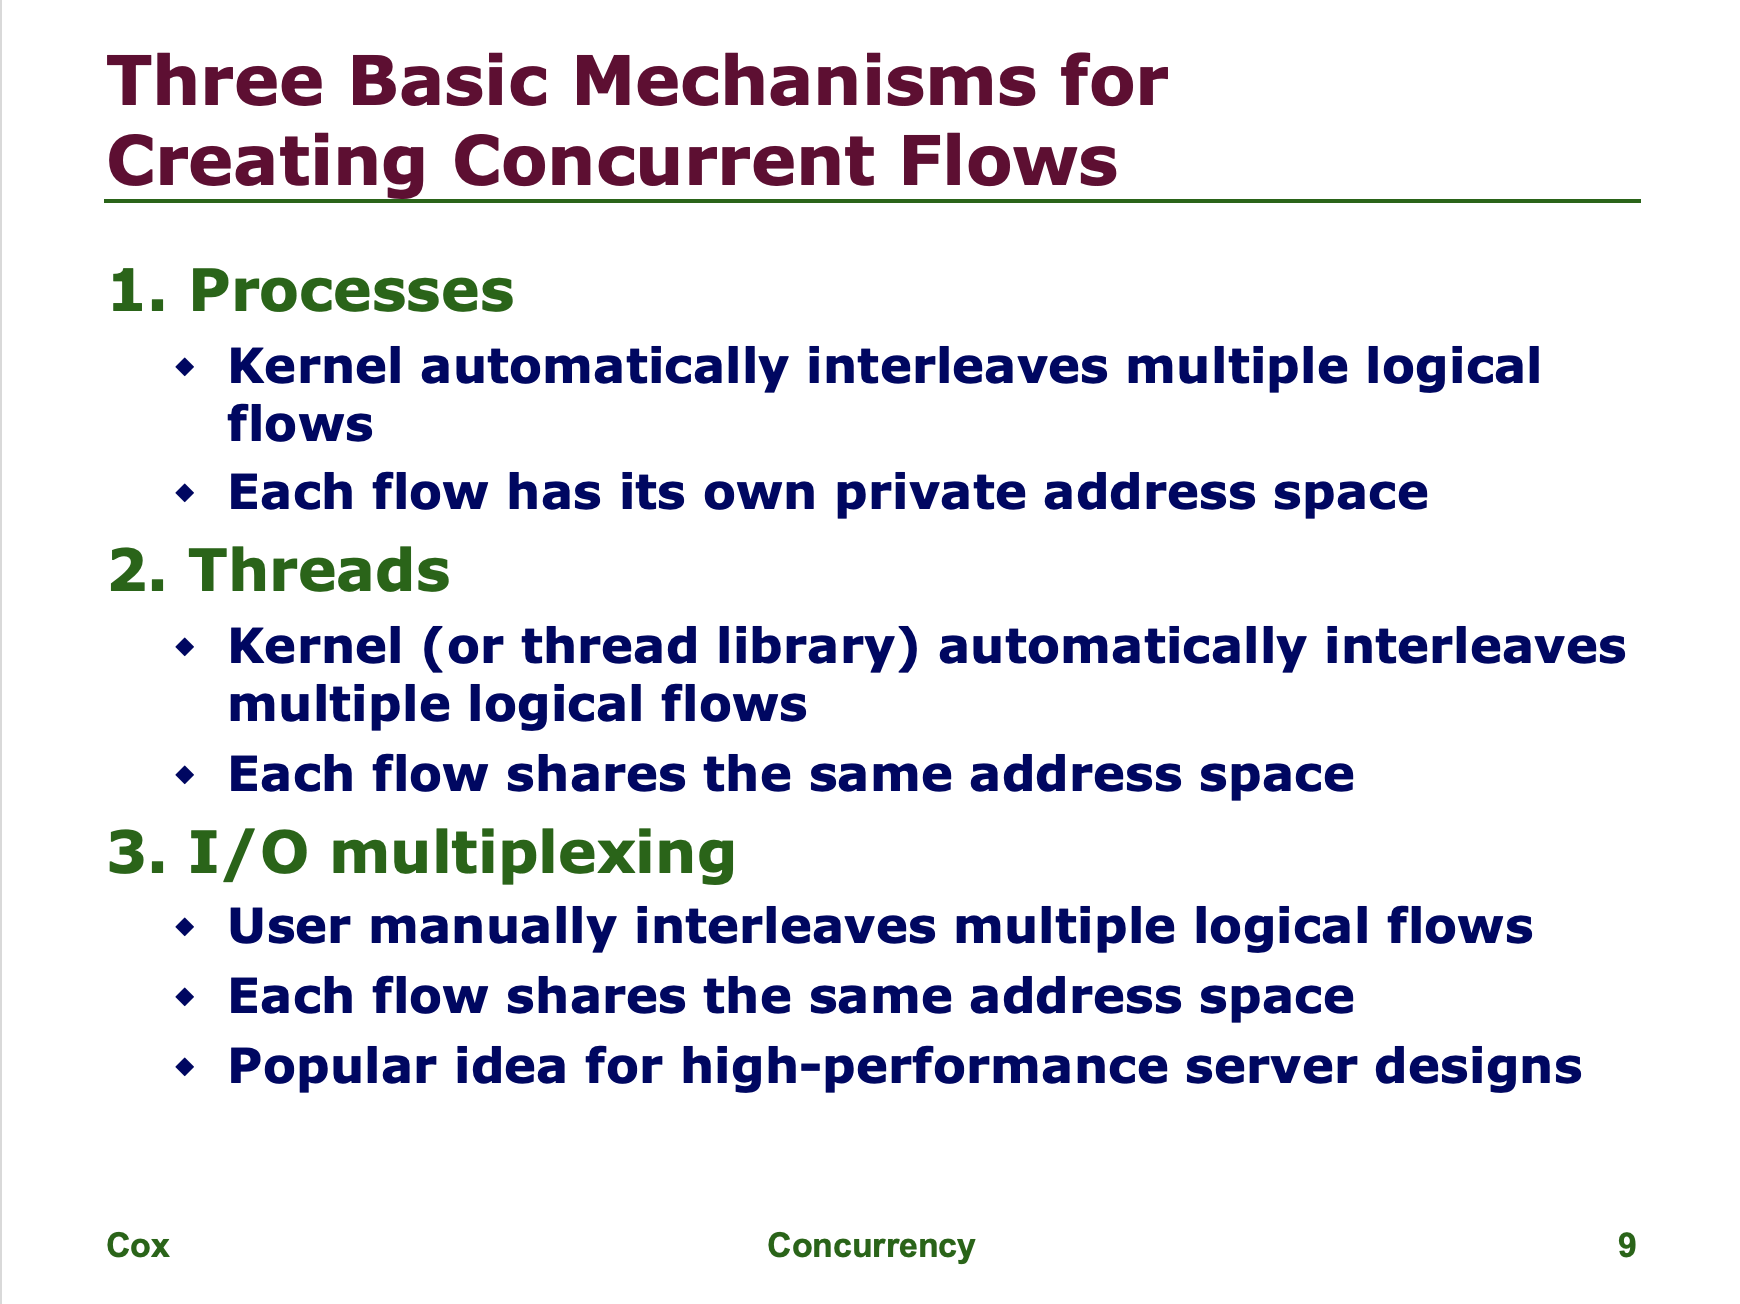

In [ ]:
answer = get_answer(query, references)

print(textwrap.fill(answer, 80))

The three basic mechanisms for creating concurrent flows are processes, threads,
and IO multiplexing. Processes are automatically interleaved by the kernel and
have their own private address space, while threads can be interleaved by either
the kernel or a thread library and share the same address space. IO multiplexing
involves manually interleaving multiple logical flows and is a popular idea for
high-performance server designs (Cox Concurrency).


In [ ]:
query = "What are some classifical garbage collection algorithms?"

references = get_references(query)
print(textwrap.fill(references[0], 80))

Cox Dynamic Memory Allocation Classical GC algorithms Reference counting Collins
1960 Does not move blocks Mark and sweep collection McCarthy 1960 Does not move
blocks unless you also   compact   Copying collection Minsky 1963 Moves blocks
compacts memory For more information see Jones and Lin   Garbage Collection
Algorithms for Automatic Dynamic Memory   John Wiley  Sons 1996.


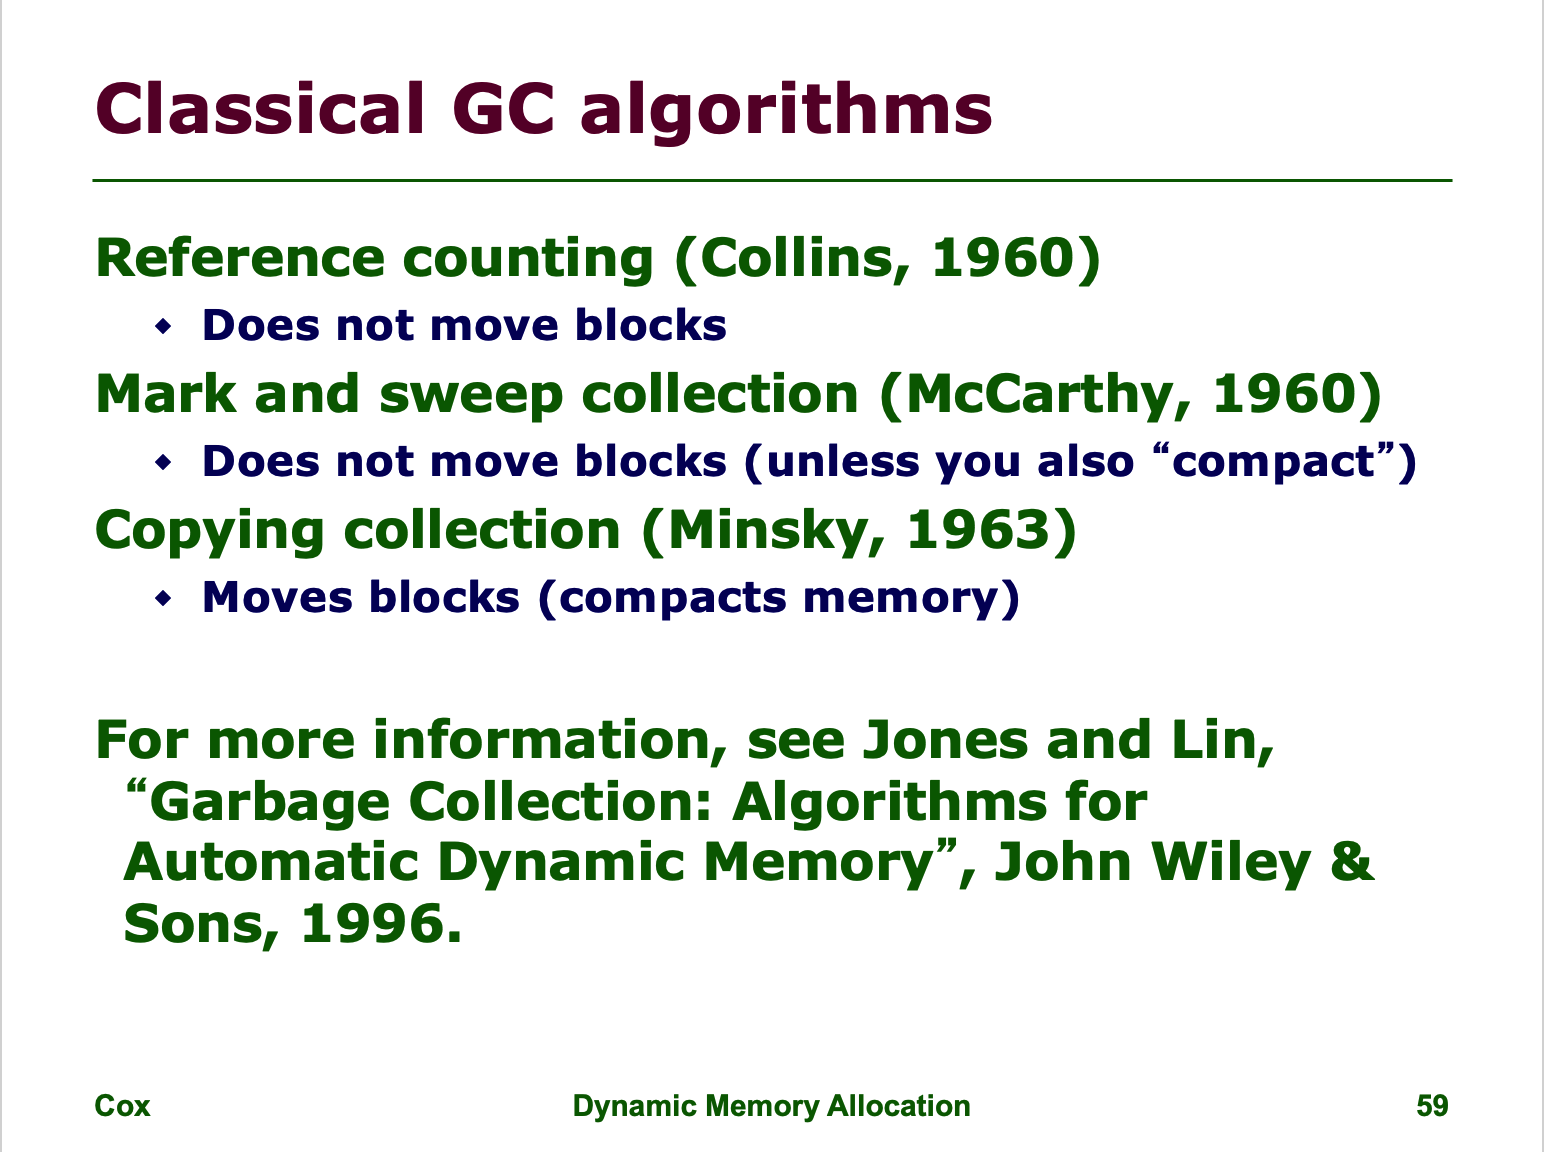

In [ ]:
answer = get_answer(query, references)

print(textwrap.fill(answer, 80))

Some classical garbage collection algorithms include reference counting, mark
and sweep collection, and copying collection. Reference counting was introduced
by Collins in 1960 and does not move blocks. Mark and sweep collection, also
introduced in 1960 by McCarthy, does not move blocks unless memory is also
compacted. Copying collection, introduced by Minsky in 1963, moves blocks and
compacts memory (Jones and Lin, 1996).


### Load and Save
As usual, saving and loading the DB are one-liners.

In [ ]:
# save your db
db.save("/content/sample_nda.db")

# Loading is just like we showed above, with an optional progress handler
#db.from_checkpoint("sample_nda.db", on_progress=lambda fraction: print(f"{fraction}% done with loading."))

'/content/sample_nda.db'

In [ ]:
!zip -r /content/sample_nda.zip /content/sample_nda.db

  adding: content/sample_nda.db/ (stored 0%)
  adding: content/sample_nda.db/model.pkl (deflated 8%)
  adding: content/sample_nda.db/logger.pkl (deflated 38%)
  adding: content/sample_nda.db/logger/ (stored 0%)
  adding: content/sample_nda.db/logger/in_memory/ (stored 0%)
  adding: content/sample_nda.db/model/ (stored 0%)
  adding: content/sample_nda.db/documents/ (stored 0%)
  adding: content/sample_nda.db/documents/0/ (stored 0%)
  adding: content/sample_nda.db/documents/0/pptx_data.csv (deflated 80%)
  adding: content/sample_nda.db/documents.pkl (deflated 71%)


### Export to Playground

Note: Currently, we support exporting to Playground UI with only 1 CSV file, if you have multiple CSV files, please watch out for our next release that will add support to export a NeuralDB directly into Playground.

In [ ]:
from export_utils import neural_db_to_playground

neural_db_to_playground(db, './sample_nda/', csv=csv_doc)